### What is Haberman's Survival Data Set ?
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


### Ojective:
Perform the exploratory data analysis on breast cancer patients.


In [1]:
#import the library numpy matplotlib,seaborn,pandas

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
# Download the Haberman's Survival Data Set from "https://www.kaggle.com/gilsousa/habermans-survival-data-set" 

#load the Haberman's Survival Data Set
df = pd.read_csv("haberman.csv") # assume that i am loading the data in current dircetory 

# here columns are not more expressable so here i am setting the columns names

col = ['Age','Year-of-operation','Positive-auxilary-nodes','Status']
df = pd.read_csv("haberman.csv",names = col)
df.head()



,Age,Year-of-operation,Positive-auxilary-nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# how many data points and features are there.
df.shape



(306, 4)

In [4]:
# Now what are the columns name of our data set

print(df.columns)

Index(['Age', 'Year-of-operation', 'Positive-auxilary-nodes', 'Status'], dtype='object')


In [5]:
# print the number of class in data set.
df['Status'].value_counts()

# Here  is 2 class and this data set is imbalnced because class1 have 225 data points and class2 have 81 data points



1    225
2     81
Name: Status, dtype: int64

In [6]:
# count,mean ,standard deviation(std),minimum(min),First quartile(25%),Second quartile(50%),Third quartile(75%), maximum(max) for each
# feature of dataset.

df.describe()


,Age,Year-of-operation,Positive-auxilary-nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations about Haberman dataset:

1.  Numbers of rows(training data) is: 306
2. Numbers of features(columns) is: 4
3. Year operation of patient show last 2 digits of years.
4. This dataset contain two class(it can be said binary classification): 
5. Status 1 =  the patient survived 5 years or longer 
6. Status 2 =  the patient died within 5 year 
5. class 1's , 225 patient survived for 5 years or longer
6. class 2 's,  85 patient died within 5 years
7. It is Imbalance data set because class 1 has 225 data point and class 2 has 81 data point.

In [7]:
# calculate the percentage  of each class
df['Status'].value_counts()*100/df.shape[0]

1    73.529412
2    26.470588
Name: Status, dtype: float64

#### Observation:
- 73% of class 1 pateints survived 5 years or more
- 26% of class 2 patients dies within 5 years



### Univariate analysis:

In [8]:
survived = df.loc[df['Status']== 1]
not_survived = df.loc[df['Status'] == 2]

In [9]:
print("Patients survied 5 years or more")
survived.describe()


Patients survied 5 years or more


,Age,Year-of-operation,Positive-auxilary-nodes,Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [10]:
print("Patients died within 5 years")
not_survived.describe()


Patients died within 5 years


,Age,Year-of-operation,Positive-auxilary-nodes,Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


#### Observation:

- Patients survived 5 years or more
  - Mean = 2.791111
  - 75%(third quartile) = 3.00000<br/>
  
- Patients died within 5 years

  - Mean = 7.456790
  - 75%(thirs quartile) = 3.000000 <br/>
- Here increaase in standard deviation,so we can say that patients who had more positive-auxilary-nodes died early.


### 1. Age Feature :

#### let us do more analysis on each features.


In [11]:
survived_status = survived['Age'].describe()
not_survived_status =not_survived['Age'].describe()

# create dataframe to store the survived_status and not_survived_status statistics.
df1_age = pd.DataFrame(data={'Survived':survived_status,'Died':not_survived_status})


df1_age


,Died,Survived
count,81.000000,225.000000
mean,53.679012,52.017778
std,10.167137,11.012154
min,34.000000,30.000000
25%,46.000000,43.000000
50%,53.000000,52.000000
75%,61.000000,60.000000
max,83.000000,77.000000


#### Observation:
- Mean of Died patients roughly equal Mean of Survived patients 
- Std of Died patients roughly equal std of Survived patients
- It is not making so much clear. i.e age of patients does not effect on patient's status


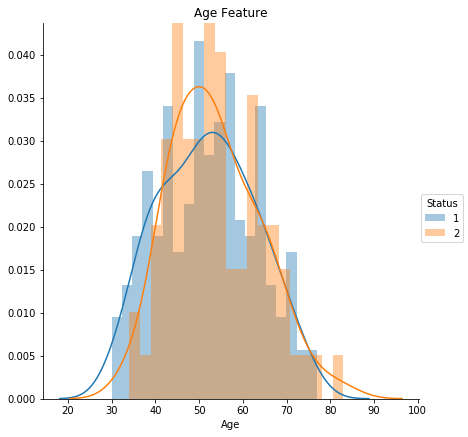

In [12]:
sns.FacetGrid(df,hue = 'Status',size =6).map(sns.distplot,'Age',bins = 20).add_legend()
plt.title("Age Feature")
plt.show()


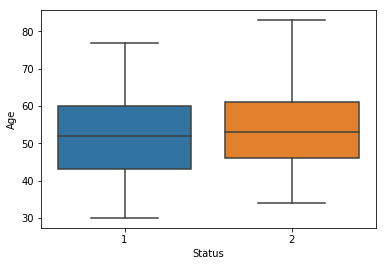

In [13]:
# draw the boxplot for age feature:
sns.boxplot(x = 'Status',y = 'Age',data = df)


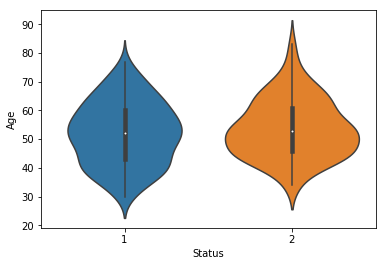

In [14]:
#  drwa the violoin plot for age feature:
sns.violinplot(x = 'Status',y = 'Age',data = df,size = 6)


[ 0.02222222  0.03111111  0.04444444  0.06222222  0.04444444  0.08        0.04
  0.05333333  0.09777778  0.06666667  0.07555556  0.08888889  0.04888889
  0.04444444  0.08        0.03111111  0.02222222  0.04        0.01333333
  0.01333333]
[ 30.    32.35  34.7   37.05  39.4   41.75  44.1   46.45  48.8   51.15
  53.5   55.85  58.2   60.55  62.9   65.25  67.6   69.95  72.3   74.65  77.  ]
[ 0.02469136  0.01234568  0.04938272  0.07407407  0.12345679  0.07407407
  0.07407407  0.12345679  0.09876543  0.03703704  0.03703704  0.08641975
  0.04938272  0.04938272  0.03703704  0.01234568  0.01234568  0.01234568
  0.          0.01234568]
[ 30.    32.35  34.7   37.05  39.4   41.75  44.1   46.45  48.8   51.15
  53.5   55.85  58.2   60.55  62.9   65.25  67.6   69.95  72.3   74.65  77.  ]


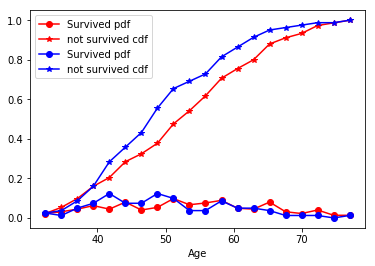

In [15]:
# now plot the pdf and cdf for Age

%matplotlib inline
# PDF & CDF
# compute pdf & cdf for survived

counts, bin_edges = np.histogram(survived['Age'],bins = 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"ro-",label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,"r*-",label = "not survived cdf")


# compute pdf & cdf for not_survived 

counts,bin_edgs = np.histogram(not_survived['Age'],bins= 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'bo-',label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,'b*-',label = "not survived cdf")
plt.legend()
plt.xlabel("Age")

plt.show()


#### Observation:
- survived and not survuved patients have similar pdf and cdf.ie huge overlap
- Age feature is not relevent to determine status of patients.

#### 2.Year-of-operation Feature:




In [16]:
survived_status = survived['Year-of-operation'].describe()
not_survived_status =not_survived['Year-of-operation'].describe()

# create dataframe to store the survived_status and not_survived_status statistics.
df1_year = pd.DataFrame(data={'Survived':survived_status,'Died':not_survived_status})


df1_year

,Died,Survived
count,81.000000,225.000000
mean,62.827160,62.862222
std,3.342118,3.222915
min,58.000000,58.000000
25%,59.000000,60.000000
50%,63.000000,63.000000
75%,65.000000,66.000000
max,69.000000,69.000000


#### Observation:
- survived and not_survied patients have similar statistics
- It does not make any sense.

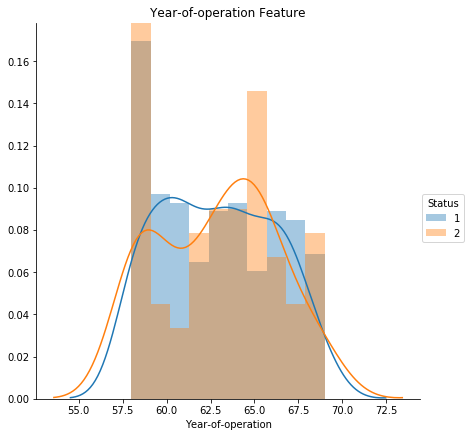

In [17]:
sns.FacetGrid(df,hue = 'Status',size =6).map(sns.distplot,'Year-of-operation',bins = 10).add_legend()
plt.title("Year-of-operation Feature")
plt.show()

#### Observation:
- Year of opeartion of patients does not classified .
- It is not useful feature to determine status of patients.

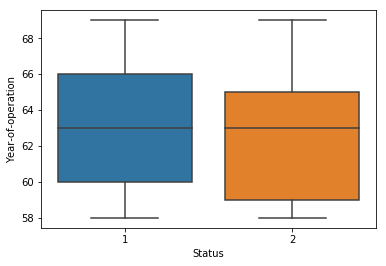

In [18]:
# draw the boxplot for year-of-operation feature:

sns.boxplot(x = 'Status',y = 'Year-of-operation',data = df)

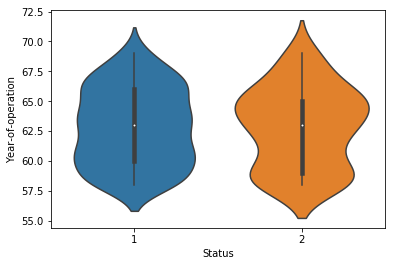

In [19]:
# draw th violinplot for year-of-operation feature:

sns.violinplot(x = 'Status',y = 'Year-of-operation',data = df)
plt.show()

[ 0.10666667  0.08        0.          0.10666667  0.          0.10222222
  0.          0.07111111  0.          0.09777778  0.10222222  0.
  0.06666667  0.          0.09777778  0.          0.09333333  0.
  0.04444444  0.03111111]
[ 58.    58.55  59.1   59.65  60.2   60.75  61.3   61.85  62.4   62.95
  63.5   64.05  64.6   65.15  65.7   66.25  66.8   67.35  67.9   68.45  69.  ]
[ 0.14814815  0.11111111  0.          0.04938272  0.          0.03703704
  0.          0.08641975  0.          0.09876543  0.09876543  0.
  0.16049383  0.          0.07407407  0.          0.04938272  0.
  0.03703704  0.04938272]
[ 58.    58.55  59.1   59.65  60.2   60.75  61.3   61.85  62.4   62.95
  63.5   64.05  64.6   65.15  65.7   66.25  66.8   67.35  67.9   68.45  69.  ]


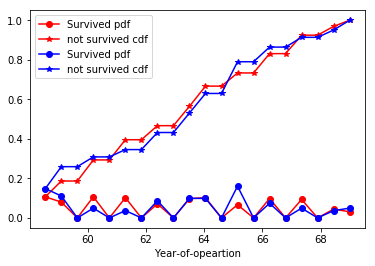

In [20]:
# now calculate pdf & cdf for year-of-operation 

%matplotlib inline
# PDF & CDF
# compute pdf & cdf for survived

counts, bin_edges = np.histogram(survived['Year-of-operation'],bins = 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"ro-",label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,"r*-",label = "not survived cdf")


# compute pdf & cdf for not_survived 

counts,bin_edgs = np.histogram(not_survived['Year-of-operation'],bins= 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'bo-',label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,'b*-',label = "not survived cdf")
plt.legend()
plt.xlabel("Year-of-opeartion")

plt.show()


#### Observation:
- survived and not_survived patients have similar plots and vital overlap
- It is not useful feature to determine status of patients.

####  3. Positive-auxilary-nodes Feature:

   

In [21]:
survived_status = survived['Positive-auxilary-nodes'].describe()
not_survived_status =not_survived['Positive-auxilary-nodes'].describe()

# create dataframe to store the survived_status and not_survived_status statistics.
df1_nodes = pd.DataFrame(data={'Survived':survived_status,'Died':not_survived_status})


df1_nodes

,Died,Survived
count,81.000000,225.000000
mean,7.456790,2.791111
std,9.185654,5.870318
min,0.000000,0.000000
25%,1.000000,0.000000
50%,4.000000,0.000000
75%,11.000000,3.000000
max,52.000000,46.000000


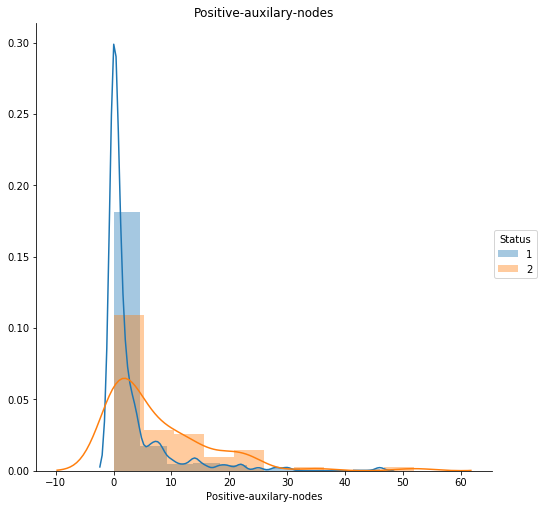

In [22]:
sns.FacetGrid(df,hue = 'Status',size =7).map(sns.distplot,'Positive-auxilary-nodes',bins = 10).add_legend()
plt.title("Positive-auxilary-nodes")
plt.show()

- Most of patients have zero positive auxilary nodes
- If positive nodes is higher then there is less chance for survival 
- If there is low or zero nodes then ,it is not surety that patients survived more yeras
- Patients having zero nodes died early and patients having almost 1 survived more.
- Higer positive -auxilary-nodes does not gives guarantee for more survival 

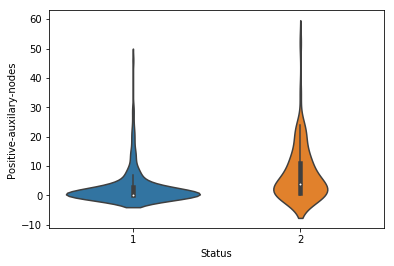

In [23]:
# draw the violinplot for Positive-auxilary-nodes

sns.violinplot(x= 'Status',y = 'Positive-auxilary-nodes',data = df)
plt.show()

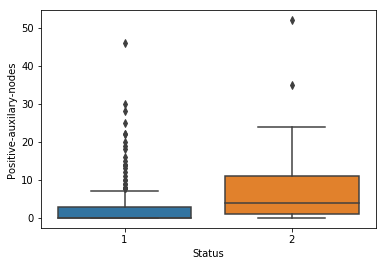

In [24]:
# draw the boxplot for Positive-auxilary-nodes

sns.boxplot(x = 'Status',y = 'Positive-auxilary-nodes',data = df)
plt.show()


#### Observation:
- 75% of survived patients and 50% of not_survives patients have positive-auxilary-nodes < 4


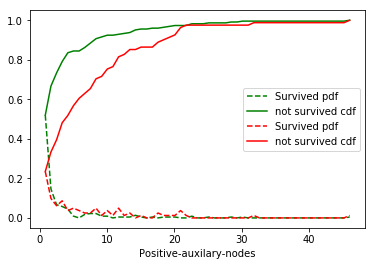

In [25]:
# now calculate the pdf & cdf for positive-auxilary nodes.

%matplotlib inline
# PDF & CDF
# compute pdf & cdf for survived

counts, bin_edges = np.histogram(survived['Positive-auxilary-nodes'],bins = 55,density = True)
pdf = counts/sum(counts)
# print(pdf)
# print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"--g",label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,"g",label = "not survived cdf")


# compute pdf & cdf for not_survived 

counts,bin_edgs = np.histogram(not_survived['Positive-auxilary-nodes'],bins= 55,density = True)
pdf = counts/sum(counts)
#print(pdf)
# print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'--r',label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,'r',label = "not survived cdf")
plt.legend()
plt.xlabel("Positive-auxilary-nodes")

plt.show()



#### Obervation:
- if postive-auxilary nodes is 1 then, then  we will misclassify the data roughly 50% of survived and 20% of not_survived

- if positive-auxilary node is 4 the, we will misclassify the data roughly 15% of survived and roughly 50% of not_survived
- if positive-auxilary node is 10 the, we will misclassify the data roughly 10% of survived and roughly 70% of not_survived 

### Bivariate Analysis:


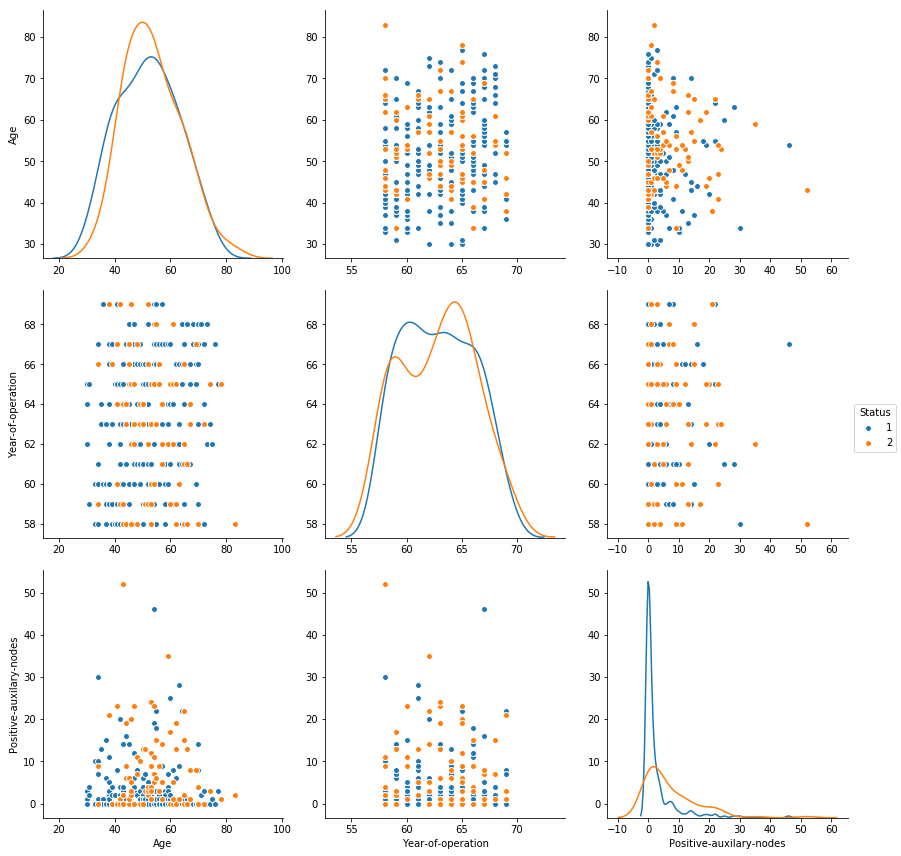

In [26]:
# plot the 3*3 grid for haberman dataset

 
# sns.set_style("whitegrid")
sns.pairplot(df,hue = 'Status',vars = ['Age','Year-of-operation','Positive-auxilary-nodes'],diag_kind = 'kde',
           size =4);
plt.show()


#### Observation:
- Year-of-operation does not play any role with with others features.


### Obsevation: 
- Age does not effect on survival status.
- Year-of -opeartion does not effect on survival status
- Positve -auxilary-nodes afffect on survival status
  - if more numbers of Positve -auxilary-nodes deetcted then patients died within 5 years
  - if less numbers of Positve -auxilary-nodes  detected then patients survived for 5 years or more
  